In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [5]:
puff10=pd.read_csv("10Puff.csv",index_col=0)

In [6]:
puff10

,3-003,5-001,6-001,7-001,11-001 (9 ARUP),12-001 (10 ARUP),13-001,17-001 (15 ARUP),18-001 (16 ARUP),17-001,18-001
Baseline,2,1,8,2,2,5,3,1,1,1,1
2,2,1,7,5,4,4,1,1,1,2,1
4,1,2,9,6,8,7,4,4,1,3,3
6,4,3,7,6,9,11,5,6,1,4,3
8,1,4,6,8,9,13,6,NaN,3,7,6
10,3,7,8,9,12,15,7,9,4,NaN,6
EOS,1,5,9,8,10,13,7,5,NaN,7,6
Cotinine(BL),151,124,59,29,280,354,159,73,30,134,39
FagerStrom,6,7,7,6,7,7,8,7,6,6,6
Cig/Day,11_20,11_20,0_10,0_10,0_10,11_20,11_20,11_20,0_10,11_20,0_10


In [7]:
puff10t = puff10.transpose()
puff10t

,Baseline,2,4,6,8,10,EOS,Cotinine(BL),FagerStrom,Cig/Day,Gender,Age,Weight (lb),"Height ("")"
3-003,2,2,1,4,1,3,1,151,6,11_20,F,44,137,67
5-001,1,1,2,3,4,7,5,124,7,11_20,M,26,155,69.5
6-001,8,7,9,7,6,8,9,59,7,0_10,M,22,165,70
7-001,2,5,6,6,8,9,8,29,6,0_10,M,23,174,68
11-001 (9 ARUP),2,4,8,9,9,12,10,280,7,0_10,M,29,260,73
12-001 (10 ARUP),5,4,7,11,13,15,13,354,7,11_20,F,25,130,64
13-001,3,1,4,5,6,7,7,159,8,11_20,M,37,206,72
17-001 (15 ARUP),1,1,4,6,NaN,9,5,73,7,11_20,M,40,230,69
18-001 (16 ARUP),1,1,1,1,3,4,NaN,30,6,0_10,M,22,135,70
17-001,1,2,3,4,7,NaN,7,134,6,11_20,M,38,175,69


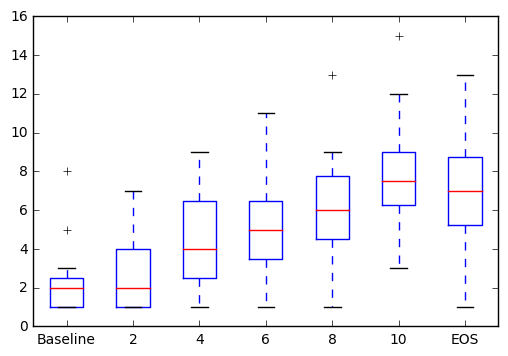

In [16]:
plot_x = ["Baseline","2","4","6","8","10","EOS"]
num_columns = ['Age','Weight (lb)','Height (")']
puff10t[plot_x]=puff10t[plot_x].apply(pd.to_numeric)
puff10t[num_columns]=puff10t[num_columns].apply(pd.to_numeric)
# create new column "offset" and set value to zero if value is 1 (one could mean anything below 2)
puff10t["offset"]=puff10t["Baseline"]
puff10t.loc[puff10t["offset"]==1,"offset"]=0
puff10t[plot_x].plot(kind='box')

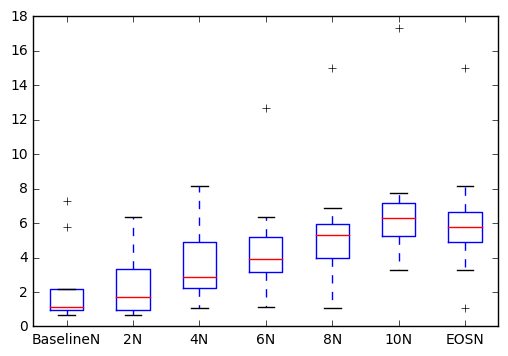

In [18]:
# create body weight normalized nicotine concentrations
plot_x_norm = ["BaselineN","2N","4N","6N","8N","10N","EOSN"]
puff10t[plot_x_norm]=puff10t[plot_x].divide(puff10t['Weight (lb)'],axis=0)*150
puff10t[plot_x_norm].plot(kind='box')

In [10]:
nic_norm_mean=np.array(puff10t[plot_x_norm].mean())
nic_norm_std=np.array(puff10t[plot_x_norm].std())
puff_norm=np.array([0,2,4,6,8,10])
p=np.polyfit(puff_norm,nic_norm_mean[:-1],1)
print(p)
linefit = p[1]+puff_norm*p[0]

[ 0.49912321  1.80503511]


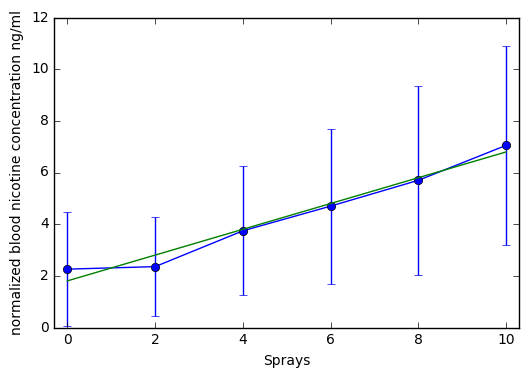

In [11]:
plt.errorbar(puff_norm,nic_norm_mean[:-1],yerr=nic_norm_std[:-1], marker='o')
plt.plot(puff_norm,linefit)
plt.xlim((-0.3,10.3))
plt.xlabel('Sprays')
plt.ylabel('normalized blood nicotine concentration ng/ml')

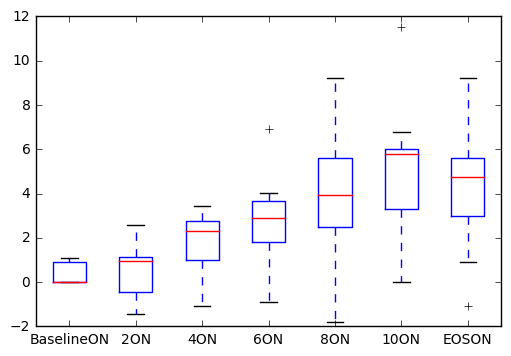

In [19]:
# try something different.  First subtract the offset and then normalize
plot_x_norm_offset = ["BaselineON","2ON","4ON","6ON","8ON","10ON","EOSON"]
puff10t[plot_x_norm_offset]=puff10t[plot_x].subtract(puff10t["offset"],axis=0).divide(puff10t['Weight (lb)'],axis=0)*150
puff10t[plot_x_norm_offset].plot(kind='box')

In [23]:
nic_norm_offset_mean=np.array(puff10t[plot_x_norm_offset].mean())
nic_norm_offset_std=np.array(puff10t[plot_x_norm_offset].std())
puff_norm_offset=np.array([2,4,6,8,10])
p2=np.polyfit(puff_norm_offset,nic_norm_offset_mean[1:-1],1)
print(p2)
linefit = p2[1]+puff_norm*p2[0]

[ 0.53947447 -0.44649598]


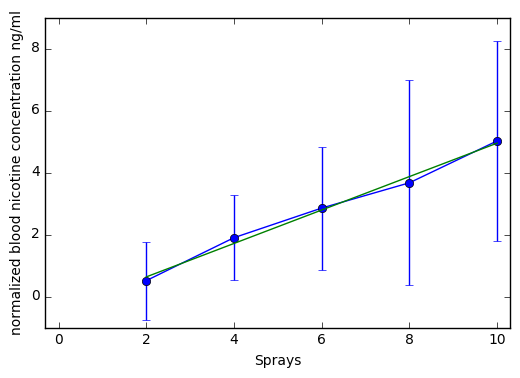

In [24]:
plt.errorbar(puff_norm_offset,nic_norm_offset_mean[1:-1],yerr=nic_norm_offset_std[1:-1], marker='o')
plt.plot(puff_norm_offset,linefit)
plt.xlim((-0.3,10.3))
plt.xlabel('Sprays')
plt.ylabel('normalized blood nicotine concentration ng/ml')